In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install torch torchvision numpy matplotlib

In [ ]:
from torchvision import datasets, transforms

In [ ]:
# Image transformációk
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]),
])

In [ ]:
### from Google Drive

!unzip /content/drive/MyDrive/slepp_melytanulas/img_align_celeba.zip -d /content/celeba


Streaming output truncated to the last 5000 lines.
 extracting: /content/celeba/img_align_celeba/197600.jpg  
 extracting: /content/celeba/img_align_celeba/197601.jpg  
 extracting: /content/celeba/img_align_celeba/197602.jpg  
 extracting: /content/celeba/img_align_celeba/197603.jpg  
 extracting: /content/celeba/img_align_celeba/197604.jpg  
 extracting: /content/celeba/img_align_celeba/197605.jpg  
 extracting: /content/celeba/img_align_celeba/197606.jpg  
 extracting: /content/celeba/img_align_celeba/197607.jpg  
 extracting: /content/celeba/img_align_celeba/197608.jpg  
 extracting: /content/celeba/img_align_celeba/197609.jpg  
 extracting: /content/celeba/img_align_celeba/197610.jpg  
 extracting: /content/celeba/img_align_celeba/197611.jpg  
 extracting: /content/celeba/img_align_celeba/197612.jpg  
 extracting: /content/celeba/img_align_celeba/197613.jpg  
 extracting: /content/celeba/img_align_celeba/197614.jpg  
 extracting: /content/celeba/img_align_celeba/197615.jpg  
 extr

In [ ]:
!ls /content/celeba/img_align_celeba/

Streaming output truncated to the last 5000 lines.
020326.jpg  045651.jpg	070976.jpg  096301.jpg	121626.jpg  146951.jpg	172276.jpg  197601.jpg
020327.jpg  045652.jpg	070977.jpg  096302.jpg	121627.jpg  146952.jpg	172277.jpg  197602.jpg
020328.jpg  045653.jpg	070978.jpg  096303.jpg	121628.jpg  146953.jpg	172278.jpg  197603.jpg
020329.jpg  045654.jpg	070979.jpg  096304.jpg	121629.jpg  146954.jpg	172279.jpg  197604.jpg
020330.jpg  045655.jpg	070980.jpg  096305.jpg	121630.jpg  146955.jpg	172280.jpg  197605.jpg
020331.jpg  045656.jpg	070981.jpg  096306.jpg	121631.jpg  146956.jpg	172281.jpg  197606.jpg
020332.jpg  045657.jpg	070982.jpg  096307.jpg	121632.jpg  146957.jpg	172282.jpg  197607.jpg
020333.jpg  045658.jpg	070983.jpg  096308.jpg	121633.jpg  146958.jpg	172283.jpg  197608.jpg
020334.jpg  045659.jpg	070984.jpg  096309.jpg	121634.jpg  146959.jpg	172284.jpg  197609.jpg
020335.jpg  045660.jpg	070985.jpg  096310.jpg	121635.jpg  146960.jpg	172285.jpg  197610.jpg
020336.jpg  045661.jpg	070986

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
# Definiáld az átalakításokat (pl. méretezés, normalizálás stb.)
transform = transforms.Compose([
    transforms.Resize((64, 64)),   # Ha kisebb képméretet szeretnél
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalizálás (-1, 1) közé
])

In [ ]:
# Adatok betöltése
celeba_data = datasets.ImageFolder(root='/content/celeba', transform=transform)
dataloader = DataLoader(celeba_data, batch_size=64, shuffle=True)

In [ ]:
# Ellenőrizzük, hogy a DataLoader működik
data_iter = iter(dataloader)
images, labels = next(data_iter)
print(images.shape)  # Pl. torch.Size([64, 3, 64, 64])

torch.Size([64, 3, 64, 64])


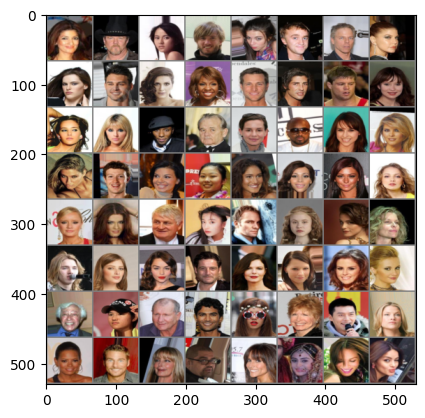

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Képek megjelenítése
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Egy batch képek betöltése
data_iter = iter(dataloader)
images, _ = next(data_iter)  # Itt használd a 'next()' függvényt

# Képek megjelenítése
imshow(torchvision.utils.make_grid(images))


In [ ]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),  # Véletlenszerű vízszintes tükrözés
    transforms.RandomRotation(10),  # Véletlenszerű forgatás 10 fokkal
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalizálás (-1, 1) közé
])


In [ ]:
# DataLoader beállítása
dataloader = DataLoader(celeba_data, batch_size=64, shuffle=True)

# Ellenőrizzük, hogy minden rendben van
data_iter = iter(dataloader)
images, labels = next(data_iter)
print(images.shape)  # Pl. torch.Size([64, 3, 64, 64])


torch.Size([64, 3, 64, 64])


In [ ]:
import os
import torch

# Képek mentése tensor formátumban (opcionális)
save_path = '/content/prepared_data.pt'
torch.save(celeba_data, save_path)

# Későbbi betöltés
loaded_data = torch.load(save_path)


<ipython-input-15-da1b67220dea>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_data = torch.load(save_path)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Képek megjelenítése
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Zaj hozzáadása egy képhez
def add_noise(image, noise_level):
    noise = torch.randn_like(image) * noise_level  # Zaj generálása
    noisy_image = image + noise
    return noisy_image

# Egy batch betöltése
data_iter = iter(dataloader)
images, _ = next(data_iter)

# Válassz ki egy képet
image = images[0]  # Első kép kiválasztása

# Zaj hozzáadása és megjelenítés különböző szinteken
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
noise_levels = [0, 0.2, 0.5, 0.8, 1.0]  # Zaj szintek

for i, noise_level in enumerate(noise_levels):
    noisy_image = add_noise(image, noise_level)
    axes[i].imshow(np.transpose(noisy_image.cpu().numpy(), (1, 2, 0)) / 2 + 0.5)  # Unnormalize
    axes[i].set_title(f"Noise level: {noise_level}")
    axes[i].axis('off')

plt.show()